# Sales Analysis

### Import neccessary Libraries

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os

### Task #1: Merge the 12 months of sales data into a single CSV file

In [3]:
files = os.listdir('./Data/')

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv('./Data/all_data.csv', index=False)

### Read in Updated dataframe

In [5]:
df = pd.read_csv('./Data/all_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Clean Up the Data

#### Drop rows of NAN

In [7]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [34]:
# Drop NaN rows
df.dropna(inplace=True)

df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

#### Find 'Or' and detete it

In [9]:
df = df[df['Order Date'].str[0:2] != 'Or']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Convert 'Quantity Ordered' and 'Price Each' to correct types

In [13]:
df.loc[:, 'Quantity Ordered'] = df['Quantity Ordered'].astype('int32')
df.loc[:, 'Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce') # make float

### Augment data with additional columns

### Task2: Add Month Column

In [11]:
df['Month'] =  df['Order Date'].str[0:2]
df.loc[:, 'Month'] = df['Month'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1.0,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task 3: Add a Sales Column

In [14]:
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.9
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.0
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1.0,700.0,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.0
186847,259355,iPhone,1.0,700.0,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.0
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


**Question 1:** What was the bset month for sales? How much was earned that month?

In [16]:
top_month_sold = df.groupby('Month').sum()[
    ['Quantity Ordered', 'Price Each', 'Sales']
].sort_values('Sales', ascending=False)

top_month_sold

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114.0,4588415.410002,4613443.340002
10,22703.0,3715554.830001,3736726.880001
4,20558.0,3367671.020001,3390670.240001
11,19798.0,3180600.680001,3199603.200001
5,18667.0,3135125.130001,3152606.750001
3,17005.0,2791207.83,2807100.38
7,16072.0,2632539.56,2647775.76
6,15253.0,2562025.61,2577802.26
8,13448.0,2230345.42,2244467.88


__Answer:__ 

December was the best month for Sales with a total of $4,613,443.34 (USD) and January was the worst month for Sales with a total value of $1,822,256.73 (USD).

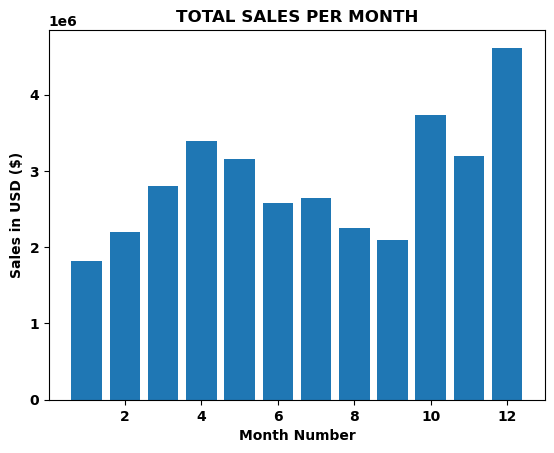

In [17]:
# Get the months and sales data
months = top_month_sold.index
sales = top_month_sold['Sales']

# Plot the bar chart
plt.bar(months, sales)

# Set the labels and title
plt.xlabel("Month Number")
plt.ylabel("Sales in USD ($)")
plt.title("TOTAL SALES PER MONTH")

# Show the plot
plt.show()

### Task 4: Add a sales column

__Question 2:__ What city had the highest number of sales?

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  object 
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  object 
 7   Sales             185950 non-null  object 
dtypes: float64(1), object(7)
memory usage: 12.8+ MB


In [21]:
# Using the .apply() method
def get_city(address):
    return address.split(',')[1]

def get_state(state):
    return state.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.9,Dallas (TX)
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1.0,600.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles (CA)
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [22]:
city_result = df.groupby('City').sum()[['Quantity Ordered', 'Price Each', 'Sales']]
city_result.sort_values(by='Sales', ascending=False)

,Quantity Ordered,Price Each,Sales
City,,,
San Francisco (CA),50239.0,8211461.740004,8262203.910004
Los Angeles (CA),33289.0,5421435.230002,5452570.800002
New York City (NY),27932.0,4635370.830002,4664317.430002
Boston (MA),22528.0,3637409.770001,3661642.010001
Atlanta (GA),16602.0,2779908.2,2795498.58
Dallas (TX),16730.0,2752627.82,2767975.4
Seattle (WA),16553.0,2733296.01,2747755.48
Portland (OR),11303.0,1860558.22,1870732.34
Austin (TX),11153.0,1809873.61,1819581.75


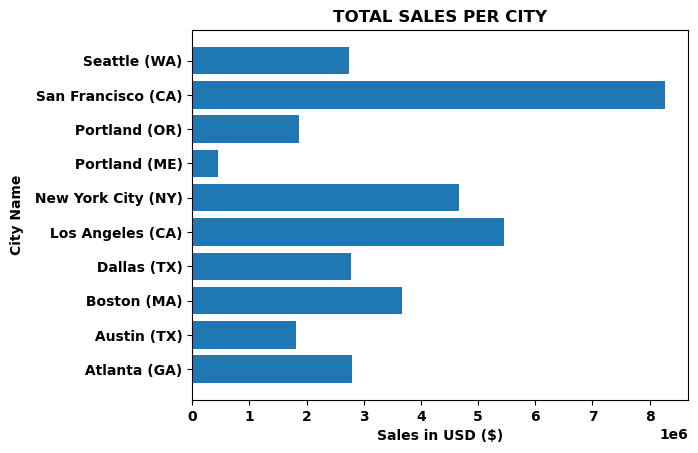

In [23]:
# Get the cities and sales data
cities = city_result.index
sales = city_result['Sales']

# Plot the horizontal bar chart
plt.barh(cities, sales)

# Set the labels and title
plt.xlabel("Sales in USD ($)")
plt.ylabel("City Name")
plt.title("TOTAL SALES PER CITY")

# Show the plot
plt.show()

__Question 3:__ What time should we display advertisements to maximize likelihood of customer's buying product?

In [32]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %H:%M:%S')

In [37]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.9,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1.0,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles (CA),14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


#### Peak Hour of Sales in the Country suitable for Advertisement

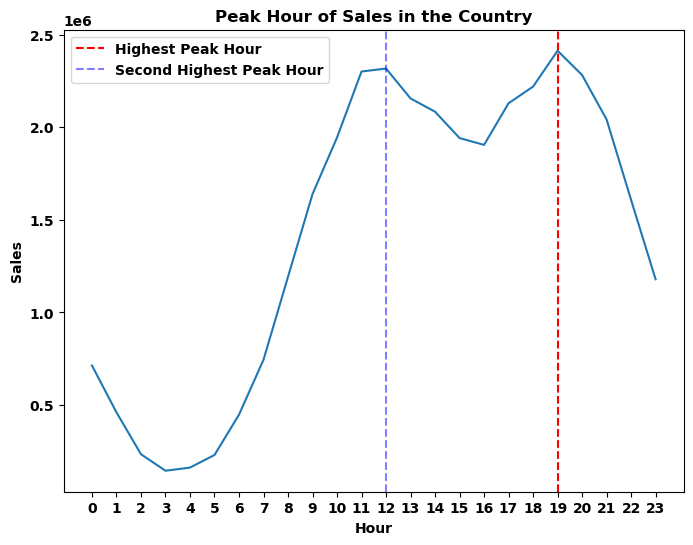

The peak hour of sales in the country, suitable for advertisement, is 19.
The second highest peak hour of sales is 12.


In [41]:
# Convert 'Sales' column to numeric
df['Sales'] = pd.to_numeric(df['Sales'])

# Group the data by hour and calculate the total sales
hourly_sales = df.groupby('Hour')['Sales'].sum()

# Find the hour with the highest sales
peak_hour = hourly_sales.idxmax()

# Find the second highest hour of sales
second_peak_hour = hourly_sales.nlargest(2).index[1]

# Set a bigger figsize
plt.figure(figsize=(8, 6))

# Plot a bar chart to visualize the hourly sales
plt.plot(hourly_sales.index, hourly_sales)
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.title('Peak Hour of Sales in the Country')
plt.xticks(hourly_sales.index)
plt.axvline(peak_hour, color='red', linestyle='--', label='Highest Peak Hour')
plt.axvline(second_peak_hour, color='blue', linestyle='--', alpha=0.5, label='Second Highest Peak Hour')
plt.legend(loc='upper left')
plt.show()

print(f"The peak hour of sales in the country, suitable for advertisement, is {peak_hour}.")
print(f"The second highest peak hour of sales is {second_peak_hour}.")


#### City with the highest sales per hour

In [42]:
highest_sales_per_city_per_hour = df.groupby('Hour').agg({'Sales': 'sum', 'City': 'first'})
highest_sales_per_city_per_hour = highest_sales_per_city_per_hour.sort_values(by='Hour', ascending=False)
highest_sales_per_city_per_hour

,Sales,City
Hour,,
23,1179304.44,Boston (MA)
22,1607549.21,Boston (MA)
21,2042000.86,Boston (MA)
20,2281716.24,New York City (NY)
19,2412938.54,Dallas (TX)
18,2219348.30,San Francisco (CA)
17,2129361.61,Los Angeles (CA)
16,1904601.31,San Francisco (CA)
15,1941549.60,Dallas (TX)


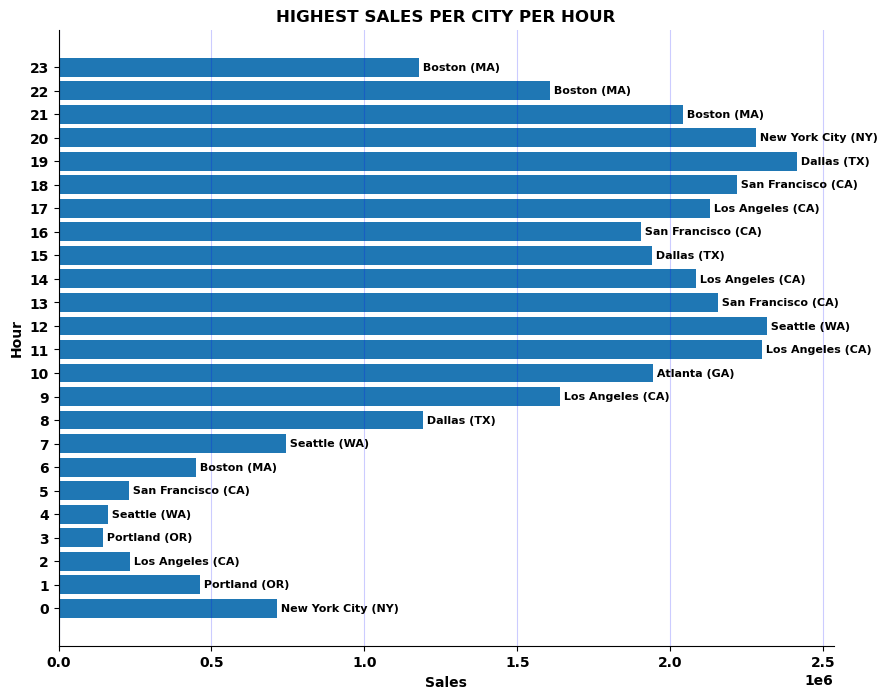

In [43]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Plot the chart
bars = plt.barh(highest_sales_per_city_per_hour.index, highest_sales_per_city_per_hour['Sales'])

# Add city names outside the bars
for bar, city, sales in zip(bars, highest_sales_per_city_per_hour['City'], highest_sales_per_city_per_hour['Sales']):
    plt.text(sales, bar.get_y() + bar.get_height() / 2, city,
             ha='left', va='center', color='black', fontsize=8)

# Remove the right and top spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Add vertical grid lines with specified color and opacity
plt.grid(axis='x', color='blue', alpha=0.2)

# Set the y-axis labels
plt.yticks(highest_sales_per_city_per_hour.index)

# Set the labels and title
plt.xlabel('Sales')
plt.ylabel('Hour')
plt.title('HIGHEST SALES PER CITY PER HOUR')

# Show the plot
plt.show()


#### Peak Hours of Sales per City

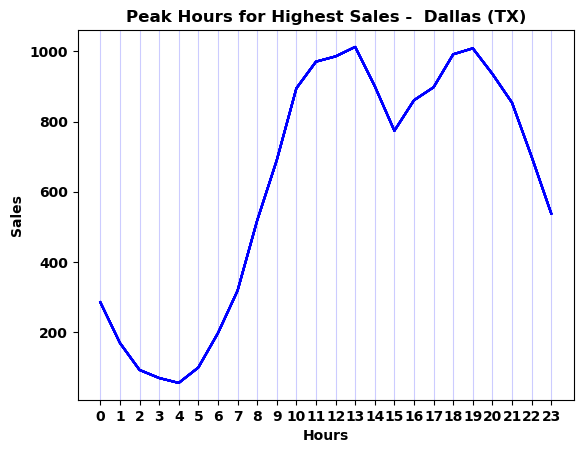

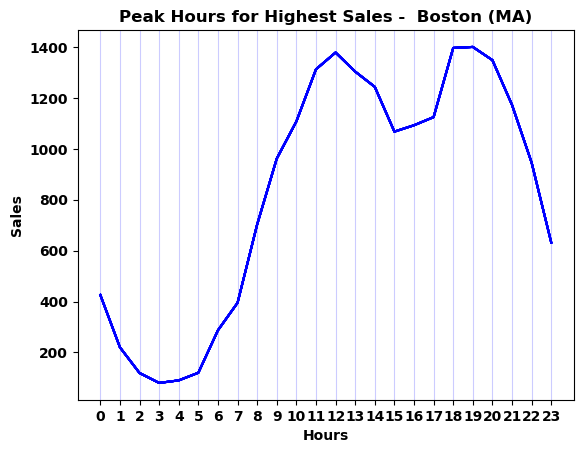

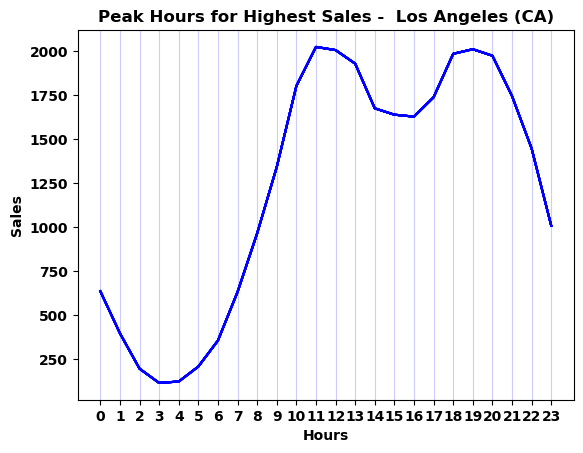

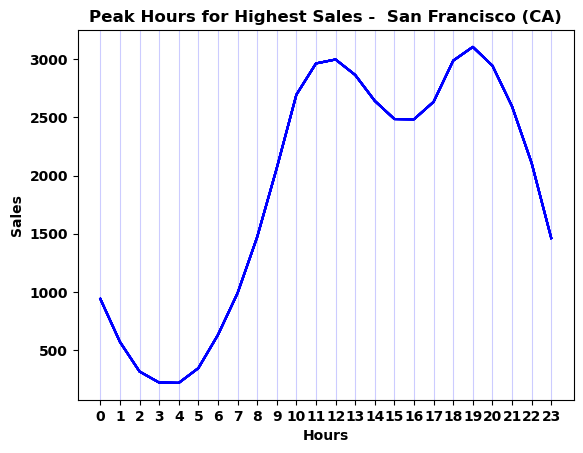

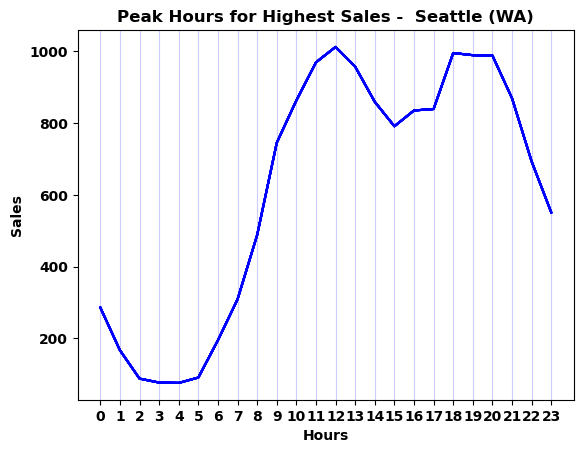

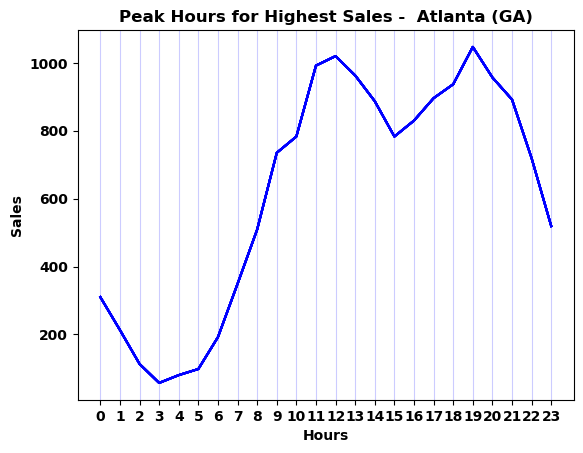

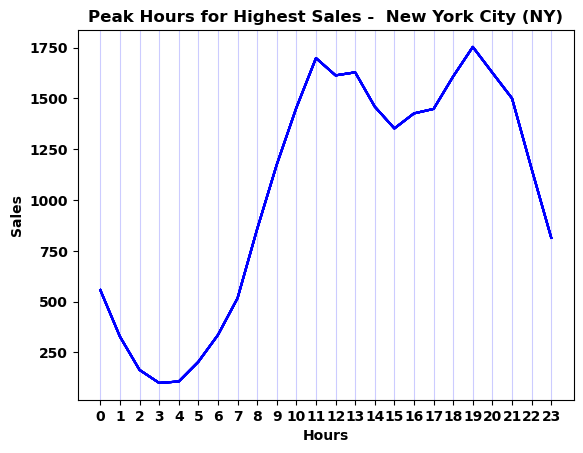

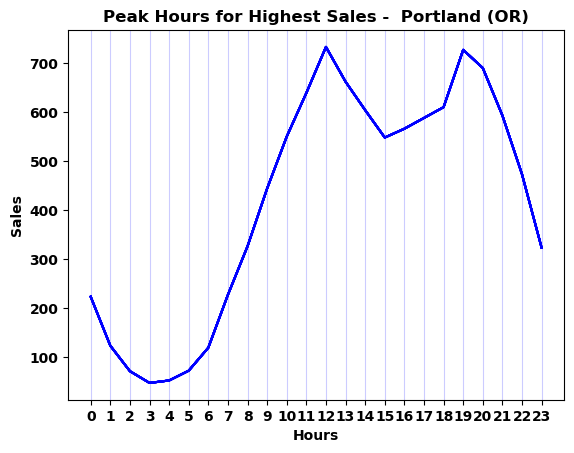

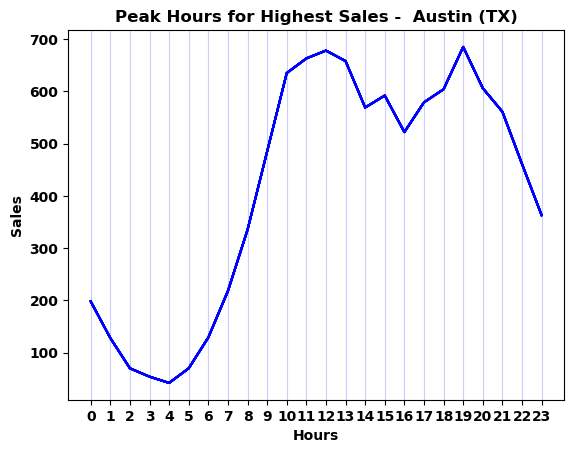

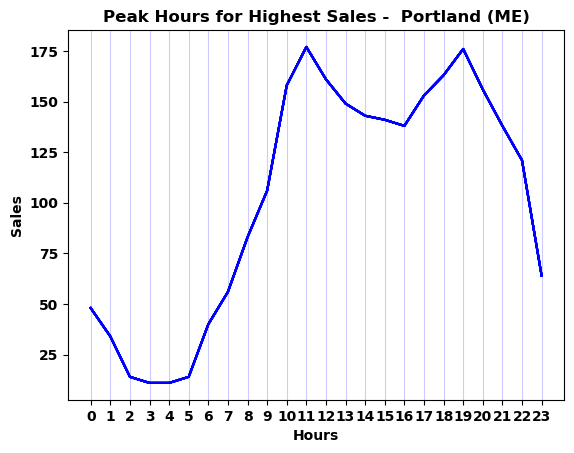

In [45]:
# Get the unique cities
cities = df['City'].unique()

# Initialize variables for highest and second highest peak
highest_peak_time = None
second_highest_peak_time = None
highest_peak_count = 0
second_highest_peak_count = 0

# Iterate over each city and create a separate plot
for city in cities:
    city_data = df[df['City'] == city]
    hours = [hour for hour, df in city_data.groupby('Hour')]
    sales_count = city_data.groupby('Hour').count()

    # Plot for the current city
    plt.plot(hours, sales_count, color='blue')
    plt.ylabel('Sales')
    plt.xlabel('Hours')
    plt.title(f'Peak Hours for Highest Sales - {city}')
    plt.xticks(hours)
    plt.grid(axis='x', color='blue', alpha=0.2)

    plt.show()

### Task 5: Add a sales column

__Question 4:__ What products are most often sold together?

In [134]:
# Select only the rows in the DataFrame where the Order ID is duplicated
new_df = df[df['Order ID'].duplicated(keep=False)].copy()

# Group the products in each order together and store the result in a new column called 'Grouped'
new_df.loc[:, 'Grouped'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Select only the columns 'Order ID' and 'Grouped', and drop any duplicated rows
new_df = new_df[['Order ID', 'Grouped']].drop_duplicates()

# Show the first 10 rows of the resulting DataFrame
new_df.head(10)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


#### 10 Most common items ordered

In [135]:
# Referenced : https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-aptython-dictionary

# Import the necessary libraries
from itertools import combinations
from collections import Counter

# Create a new Counter object
count = Counter()

# Loop through each row in the 'Grouped' column of the DataFrame
for row in new_df['Grouped']:
    # Split the row into a list of products
    row_list = row.split(',')
    # Count the unique pairs of products in the row and update the Counter object
    count.update(Counter(combinations(row_list, 1)))

# Print the 10 most common pairs of products and their counts
for key, value in count.most_common(10):
    print(key, value)


('USB-C Charging Cable',) 2111
('iPhone',) 1867
('Lightning Charging Cable',) 1827
('Wired Headphones',) 1674
('Google Phone',) 1639
('Apple Airpods Headphones',) 974
('Bose SoundSport Headphones',) 820
('AAA Batteries (4-pack)',) 815
('AA Batteries (4-pack)',) 768
('Vareebadd Phone',) 601


#### 10 most common double-order products

In [136]:
# Create a new Counter object
count = Counter()

# Loop through each row in the 'Grouped' column of the DataFrame
for row in new_df['Grouped']:
    # Split the row into a list of products
    row_list = row.split(',')
    # Count the unique pairs of products in the row and update the Counter object
    count.update(Counter(combinations(row_list, 2)))

# Print the 10 most common pairs of products and their counts
for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### 10 most common three-order products

In [137]:
# Create a new Counter object
count = Counter()

# Loop through each row in the 'Grouped' column of the DataFrame
for row in new_df['Grouped']:
    # Split the row into a list of products
    row_list = row.split(',')
    # Count the unique pairs of products in the row and update the Counter object
    count.update(Counter(combinations(row_list, 3)))

# Print the 10 most common pairs of products and their counts
for key, value in count.most_common(10):
    print(key, value)


('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


In [138]:
# Create a new Counter object
count = Counter()

# Loop through each row in the 'Grouped' column of the DataFrame
for row in new_df['Grouped']:
    # Split the row into a list of products
    row_list = row.split(',')
    # Count the unique pairs of products in the row and update the Counter object
    count.update(Counter(combinations(row_list, 4)))

# Print the 10 most common pairs of products and their counts
for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Wired Headphones', 'AA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', '34in Ultrawide Monitor') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones', 'Apple Airpods Headphones') 1
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones', 'Google Phone') 1
('iPhone', 'Lightning Charging Cable', 'Wired Headphones', 'Google Phone') 1
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones', 'Google Phone') 1


In [139]:
# Create a new Counter object
count = Counter()

# Loop through each row in the 'Grouped' column of the DataFrame
for row in new_df['Grouped']:
    # Split the row into a list of products
    row_list = row.split(',')
    # Count the unique pairs of products in the row and update the Counter object
    count.update(Counter(combinations(row_list, 5)))

# Print the 10 most common pairs of products and their counts
for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones', 'Google Phone') 1


__Question 5:__ What product sold the most? Why do you think it sold the most?

In [87]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1.0,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


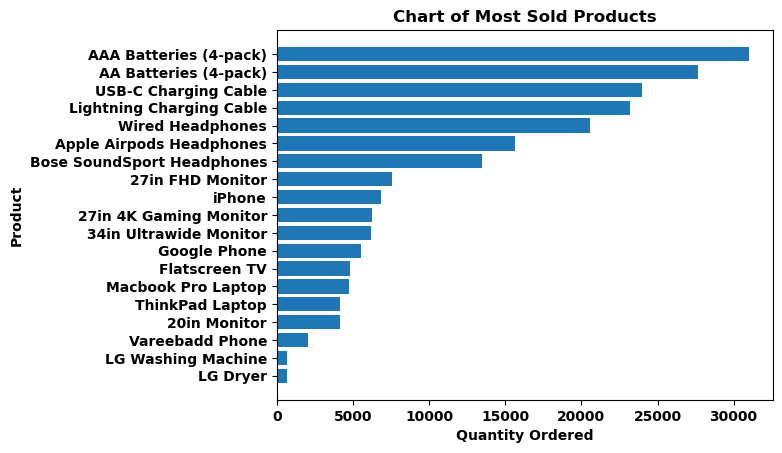

In [156]:
# Group the data by product and select the columns to include
product_group = df.groupby('Product')[
    ['Quantity Ordered', 'Price Each', 'Month', 'Sales', 'Hour', 'Minute']
]

# Sum the quantity ordered for each product
quantity_ordered = product_group.sum()['Quantity Ordered']

# Get the list of products
products = [product for product, df in product_group]

# Sort the products by the quantity ordered in ascending order
sorted_products = [product for _, product in sorted(zip(quantity_ordered, products))]

# Sort the quantity ordered in ascending order
sorted_quantity_ordered = sorted(quantity_ordered)

# Create a horizontal bar chart
plt.barh(sorted_products, sorted_quantity_ordered)

# Set the x and y axis labels and chart title
plt.xlabel('Quantity Ordered')
plt.ylabel('Product')
plt.title('Chart of Most Sold Products')

# Show the chart
plt.show()


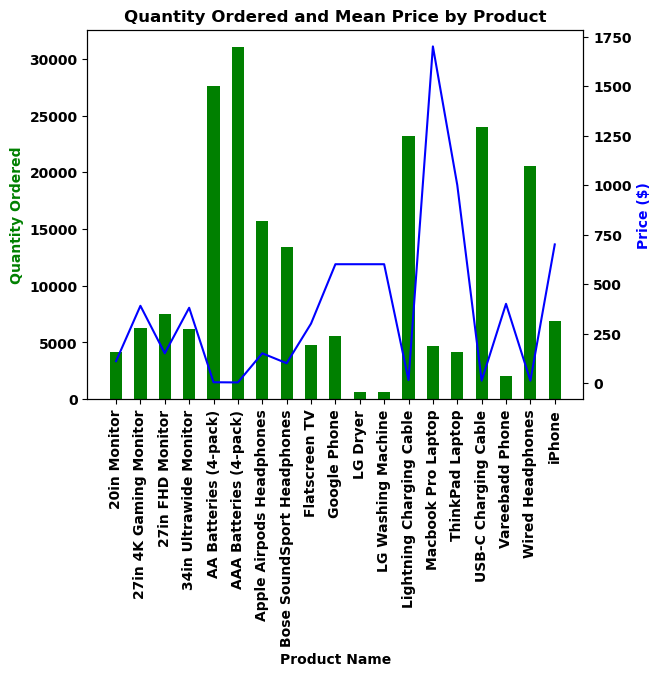

In [187]:
# Group the data by product and select the columns to include
product_group = df.groupby('Product')[['Quantity Ordered', 'Price Each']]

# Calculate the mean price for each product
product_prices = product_group.mean()['Price Each']

# Sum the quantity ordered for each product
product_quantities = product_group.sum()['Quantity Ordered']

# Create a horizontal bar chart
fig, ax1 = plt.subplots()

# Create a second y-axis for the line chart
ax2 = ax1.twinx()

# Create the bar chart
ax1.bar(product_quantities.index, product_quantities, color='g', width=0.5)

# Create the line chart
ax2.plot(product_prices.index, product_prices, 'b-')

# Set the chart title
plt.title('Quantity Ordered and Mean Price by Product')

# Set the axis labels and colors
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

# Set the x-axis tick labels and rotation
ax1.set_xticks(product_quantities.index)
ax1.set_xticklabels(product_quantities.index, rotation=90)

# Show the chart
plt.show()


The shows that most product most number of purchases are probably lower than the qumantity ordered of product with higher prices